In [448]:
import pandas as pd
import re
import numpy as np
import scipy
from matplotlib import*


pd.set_option('display.max_rows', None)


from scipy import stats
import matplotlib.pyplot as plt


from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"


In [372]:
df=pd.read_csv("C:\\Users\\vova\\downloads\\Product Management Salaries in Israel.csv",thousands=',')

In [373]:
df.head()

,Number,Seniority Level,Years of Experience in Product Roles,Monthly Gross Salary (Bruto),Gender,Age,Type of Workplace,Years of Experience in Non-Product Roles,Employment Model,Education Type -Bachelor's Degree,Education Type - Master's Degree,Job Location,Industry,Comment,Created,Roles before Product Managment,Number of Kids,Calculation
0,500,Mid-level (between junior & senior),2 - 4 Years,₪34,Woman,37 - 43,"Startup Company (Small, 1 - 40 People)",9 - 13 Years,Employee,"BSc, Computer Science",NaN,Tel Aviv Metro Area,Tourism / Transportation,NaN,20.3.2021 19:28,Software Developer,3.0,1
1,469,Senior,2 - 4 Years,₪35,Woman,31 - 36,Enterprise,5 - 8 Years,Employee,"BA, Communication",MBA,Tel Aviv Metro Area,Other,NaN,20.3.2021 18:32,NaN,1.0,1
2,679,Mid-level (between junior & senior),5 - 8 Years,"₪1,900",Man,37 - 43,"Startup Company (Medium, 41 - 200 People)",5 - 8 Years,Employee,"BA, Philosophy",Other Master's Degree,Tel Aviv Metro Area,Other,NaN,24.3.2021 18:56,QA,0.0,0
3,758,Mid-level (between junior & senior),2 - 4 Years,"₪2,400",Man,31 - 36,"Startup Company (Big, 201+ People)",5 - 8 Years,Employee,"BA, other",NaN,Tel Aviv Metro Area,Other,NaN,2.5.2021 21:54,Other,1.0,1
4,766,Junior,0 - 1 Year,"₪10,000",Woman,18 - 24,"Other (Like Bank, Government, Not a startup, e...",5 - 8 Years,Employee,No bachelors degree,Other Master's Degree,Tel Aviv Metro Area,Data / Analytics / AI,NaN,3.5.2021 07:09,Customer Success,0.0,1


In [374]:
df.nunique()
#len(df)

Number                                      538
Seniority Level                               5
Years of Experience in Product Roles          5
Monthly Gross Salary (Bruto)                 81
Gender                                        2
Age                                           6
Type of Workplace                             5
Years of Experience in Non-Product Roles      5
Employment Model                              2
Education Type -Bachelor's Degree            23
Education Type - Master's Degree              4
Job Location                                  6
Industry                                     14
Comment                                      39
Created                                     480
Roles before Product Managment               74
Number of Kids                                6
Calculation                                   2
dtype: int64

In [375]:
#count_row = df.shape[0]  # Gives number of rows
df.shape 

(538, 18)

In [376]:
538*18

9684

In [377]:
df.isnull().sum().sum()

1373

In [378]:
np.sum(df.count()) # not nan values

8311

In [379]:
8311+1373

9684

In [380]:
df['Seniority Level'].value_counts(dropna=False)

Mid-level (between junior & senior)            186
Senior                                         152
Middle Management (Head of, Director, etc.)     80
Junior                                          77
Executive (VP, CPO, SVP etc.)                   43
Name: Seniority Level, dtype: int64

In [381]:
df['Seniority Level'].isnull().sum()

0

In [382]:
df['Years of Experience in Product Roles'].value_counts(dropna=False)

2 - 4 Years     209
5 - 8 Years     152
0 - 1 Year       94
9 - 13 Years     63
14+ Years        20
Name: Years of Experience in Product Roles, dtype: int64

In [383]:


df['recoded_Years_Ex_in_Product_Roles']=df['Years of Experience in Product Roles']
df.recoded_Years_Ex_in_Product_Roles.replace(['0 - 1 Year', '2 - 4 Years','5 - 8 Years','9 - 13 Years','14+ Years'],[1,2,3,4,5], inplace=True)

In [384]:
df["recoded_Years_Ex_in_Product_Roles"].value_counts(dropna=False)

2    209
3    152
1     94
4     63
5     20
Name: recoded_Years_Ex_in_Product_Roles, dtype: int64

In [385]:
df.head()

,Number,Seniority Level,Years of Experience in Product Roles,Monthly Gross Salary (Bruto),Gender,Age,Type of Workplace,Years of Experience in Non-Product Roles,Employment Model,Education Type -Bachelor's Degree,Education Type - Master's Degree,Job Location,Industry,Comment,Created,Roles before Product Managment,Number of Kids,Calculation,recoded_Years_Ex_in_Product_Roles
0,500,Mid-level (between junior & senior),2 - 4 Years,₪34,Woman,37 - 43,"Startup Company (Small, 1 - 40 People)",9 - 13 Years,Employee,"BSc, Computer Science",NaN,Tel Aviv Metro Area,Tourism / Transportation,NaN,20.3.2021 19:28,Software Developer,3.0,1,2
1,469,Senior,2 - 4 Years,₪35,Woman,31 - 36,Enterprise,5 - 8 Years,Employee,"BA, Communication",MBA,Tel Aviv Metro Area,Other,NaN,20.3.2021 18:32,NaN,1.0,1,2
2,679,Mid-level (between junior & senior),5 - 8 Years,"₪1,900",Man,37 - 43,"Startup Company (Medium, 41 - 200 People)",5 - 8 Years,Employee,"BA, Philosophy",Other Master's Degree,Tel Aviv Metro Area,Other,NaN,24.3.2021 18:56,QA,0.0,0,3
3,758,Mid-level (between junior & senior),2 - 4 Years,"₪2,400",Man,31 - 36,"Startup Company (Big, 201+ People)",5 - 8 Years,Employee,"BA, other",NaN,Tel Aviv Metro Area,Other,NaN,2.5.2021 21:54,Other,1.0,1,2
4,766,Junior,0 - 1 Year,"₪10,000",Woman,18 - 24,"Other (Like Bank, Government, Not a startup, e...",5 - 8 Years,Employee,No bachelors degree,Other Master's Degree,Tel Aviv Metro Area,Data / Analytics / AI,NaN,3.5.2021 07:09,Customer Success,0.0,1,1


In [386]:
df['Monthly Gross Salary (Bruto)'].head(10)
#Monthly_gross_salary

0        ₪34
1        ₪35
2     ₪1,900
3     ₪2,400
4    ₪10,000
5    ₪11,000
6    ₪12,000
7    ₪12,000
8    ₪12,000
9    ₪12,000
Name: Monthly Gross Salary (Bruto), dtype: object

In [387]:
df['Monthly Gross Salary (Bruto)'].tail(10)

528    ₪67,000
529    ₪32,000
530    ₪26,500
531    ₪29,000
532    ₪40,000
533    ₪16,000
534    ₪20,000
535    ₪18,000
536    ₪30,500
537    ₪43,000
Name: Monthly Gross Salary (Bruto), dtype: object

In [388]:
df['Monthly Gross Salary (Bruto)'].isnull().sum()

0

In [389]:
df['Age'].value_counts(dropna=False)

31 - 36    226
37 - 43    160
25 - 30     94
44 - 50     46
18 - 24     10
51 - 56      2
Name: Age, dtype: int64

In [390]:
df['Gender'].value_counts(dropna=False)

Man      289
Woman    249
Name: Gender, dtype: int64

In [391]:
df['Years of Experience in Non-Product Roles'].value_counts(dropna=False)

2 - 4 Years     171
5 - 8 Years     145
9 - 13 Years     86
0 - 1 Year       50
14+ Years        50
NaN              36
Name: Years of Experience in Non-Product Roles, dtype: int64

In [392]:
df['Type of Workplace'].value_counts(dropna=False)

Startup Company (Medium, 41 - 200 People)             165
Enterprise                                            131
Startup Company (Small, 1 - 40 People)                105
Startup Company (Big, 201+ People)                    104
Other (Like Bank, Government, Not a startup, etc.)     33
Name: Type of Workplace, dtype: int64

In [393]:
df['Employment Model'].value_counts(dropna=False)

Employee      530
Freelancer      7
NaN             1
Name: Employment Model, dtype: int64

In [394]:
df['Education Type -Bachelor\'s Degree'].value_counts(dropna=False)

BSc, Industrial Engineering and Management     71
BSc, Computer Science                          68
BA, other                                      59
No bachelors degree                            50
BSc, other                                     39
BA, Business Administration                    32
BA, Computer Science                           31
BA, Psychology                                 29
BA, Economics                                  27
BSc, Electrical and Electronics Engineering    26
BSc, Information Systems                       20
BA, Communication                              17
BA, Computer Science and Math                  15
BSc, Biomedical Engineering                    14
B.Des                                           8
BSc, Computer Engineering                       7
BSc, Mechanical Engineering                     5
BA, Philosophy                                  5
BSc, Physics                                    4
NaN                                             4


In [395]:
df['Education Type - Master\'s Degree'].value_counts(dropna=False)

NaN                         319
MBA                         110
Other Master's Degree        82
MSc, Computer Science        18
MA, Cognitive Psychology      9
Name: Education Type - Master's Degree, dtype: int64

In [396]:
df['Job Location'].value_counts(dropna=False)

Tel Aviv Metro Area    415
Sharon Area             82
North of Israel         22
South of Israel          7
Jerusalem Area           6
NaN                      5
Eilat Area               1
Name: Job Location, dtype: int64

In [397]:
df['Industry'].value_counts(dropna=False)

NaN                         124
SaaS                         78
Other                        63
Cyber Security               59
Banking / Finance            38
Healthcare                   34
Data / Analytics / AI        33
Consumer Goods / Retail      26
Advertising / Marketing      25
Gaming                       20
Telecommunications           12
Hardware                      9
Tourism / Transportation      9
Education                     6
Insurance                     2
Name: Industry, dtype: int64

In [398]:
#df['Comment'].value_counts(dropna=False)

In [399]:
#df['Monthly_G_S_1'] = df.apply(lambda row: [int(s) for s in df['Monthly_G_S'].str.extract('(\d+)')]
df['Monthly_G_S']=df['Monthly Gross Salary (Bruto)'].str.slice(start=1) 

In [400]:

df['Monthly_G_S_'] = df['Monthly_G_S'].str.replace(',', '')
df['Monthly_G_S_']=df['Monthly_G_S_'].astype(int)
#df.Monthly_G_S_.sort_values()
df['Monthly_G_S_'].describe()

count      538.000000
mean     29991.810409
std       9691.245826
min         34.000000
25%      24000.000000
50%      30000.000000
75%      35000.000000
max      67000.000000
Name: Monthly_G_S_, dtype: float64

In [401]:
sum_Monthly_G_S=df['Monthly_G_S_'].sum()
sum_Monthly_G_S

16135594

In [402]:
# create a list of our conditions
conditions = [
    (df['Monthly_G_S_'] <= 10000),
    (df['Monthly_G_S_'] > 10000) & (df['Monthly_G_S_'] <= 20000),
    (df['Monthly_G_S_'] > 20000) & (df['Monthly_G_S_'] <= 30000),
    (df['Monthly_G_S_'] > 30000)
    ]

# create a list of the values we want to assign for each condition
values = ['low_income', 'medium_income', 'high_income', 'very_high_income']

# create a new column and use np.select to assign values to it using our lists as arguments
df['level_of_income'] = np.select(conditions, values)

In [403]:
df['level_of_income'].value_counts(dropna=False)

very_high_income    249
high_income         196
medium_income        88
low_income            5
Name: level_of_income, dtype: int64

In [404]:
#recode Seniority Level

#recoded_Seniority_Level = {"Seniority Level":{"Mid-level (between junior & senior)":2,"Middle Management (Head of, Director, etc.)": 3,
                                            # "Junior":1,"Senior":4,"Executive (VP, CPO, SVP etc.)":5}}
# or:
    
#df2 = df.copy()
df['recoded_Seniority_Level']=df['Seniority Level']
df.recoded_Seniority_Level.replace(['Junior', 'Mid-level (between junior & senior)','Middle Management (Head of, Director, etc.)','Senior','Executive (VP, CPO, SVP etc.)'],[1,2,3,4,5], inplace=True)

In [405]:
df.head()

,Number,Seniority Level,Years of Experience in Product Roles,Monthly Gross Salary (Bruto),Gender,Age,Type of Workplace,Years of Experience in Non-Product Roles,Employment Model,Education Type -Bachelor's Degree,...,Comment,Created,Roles before Product Managment,Number of Kids,Calculation,recoded_Years_Ex_in_Product_Roles,Monthly_G_S,Monthly_G_S_,level_of_income,recoded_Seniority_Level
0,500,Mid-level (between junior & senior),2 - 4 Years,₪34,Woman,37 - 43,"Startup Company (Small, 1 - 40 People)",9 - 13 Years,Employee,"BSc, Computer Science",...,NaN,20.3.2021 19:28,Software Developer,3.0,1,2,34,34,low_income,2
1,469,Senior,2 - 4 Years,₪35,Woman,31 - 36,Enterprise,5 - 8 Years,Employee,"BA, Communication",...,NaN,20.3.2021 18:32,NaN,1.0,1,2,35,35,low_income,4
2,679,Mid-level (between junior & senior),5 - 8 Years,"₪1,900",Man,37 - 43,"Startup Company (Medium, 41 - 200 People)",5 - 8 Years,Employee,"BA, Philosophy",...,NaN,24.3.2021 18:56,QA,0.0,0,3,"1,900",1900,low_income,2
3,758,Mid-level (between junior & senior),2 - 4 Years,"₪2,400",Man,31 - 36,"Startup Company (Big, 201+ People)",5 - 8 Years,Employee,"BA, other",...,NaN,2.5.2021 21:54,Other,1.0,1,2,"2,400",2400,low_income,2
4,766,Junior,0 - 1 Year,"₪10,000",Woman,18 - 24,"Other (Like Bank, Government, Not a startup, e...",5 - 8 Years,Employee,No bachelors degree,...,NaN,3.5.2021 07:09,Customer Success,0.0,1,1,"10,000",10000,low_income,1


In [406]:
df['recoded_Seniority_Level'].value_counts(dropna=False)

2    186
4    152
3     80
1     77
5     43
Name: recoded_Seniority_Level, dtype: int64

In [407]:
df.isnull().sum()

Number                                        0
Seniority Level                               0
Years of Experience in Product Roles          0
Monthly Gross Salary (Bruto)                  0
Gender                                        0
Age                                           0
Type of Workplace                             0
Years of Experience in Non-Product Roles     36
Employment Model                              1
Education Type -Bachelor's Degree             4
Education Type - Master's Degree            319
Job Location                                  5
Industry                                    124
Comment                                     499
Created                                       0
Roles before Product Managment              197
Number of Kids                              188
Calculation                                   0
recoded_Years_Ex_in_Product_Roles             0
Monthly_G_S                                   0
Monthly_G_S_                            

In [408]:
df.groupby(['Gender','level_of_income'])['Monthly_G_S_'].count().reset_index()

,Gender,level_of_income,Monthly_G_S_
0,Man,high_income,99
1,Man,low_income,2
2,Man,medium_income,37
3,Man,very_high_income,151
4,Woman,high_income,97
5,Woman,low_income,3
6,Woman,medium_income,51
7,Woman,very_high_income,98


In [409]:
df.groupby("Gender").agg({"Monthly_G_S_": np.sum})
#df.groupby(['Fruit','Name'],as_index = False).sum().pivot('Fruit','Name').fillna(0)

,Monthly_G_S_
Gender,
Man,9140900
Woman,6994694


In [410]:
 df['Number of Kids'].round().head()

0    3.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Number of Kids, dtype: float64

In [411]:
df['Number of Kids'].value_counts(dropna=False)

NaN    188
0.0    135
2.0    105
3.0     56
1.0     43
4.0      9
5.0      2
Name: Number of Kids, dtype: int64

In [412]:
df['Number of Kids_'] = df['Number of Kids'].fillna(0)

In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Number                                    538 non-null    int64  
 1   Seniority Level                           538 non-null    object 
 2   Years of Experience in Product Roles      538 non-null    object 
 3   Monthly Gross Salary (Bruto)              538 non-null    object 
 4   Gender                                    538 non-null    object 
 5   Age                                       538 non-null    object 
 6   Type of Workplace                         538 non-null    object 
 7   Years of Experience in Non-Product Roles  502 non-null    object 
 8   Employment Model                          537 non-null    object 
 9   Education Type -Bachelor's Degree         534 non-null    object 
 10  Education Type - Master's Degree      

In [414]:
df['Number of Kids_']=df['Number of Kids_'].astype(np.int64)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Number                                    538 non-null    int64  
 1   Seniority Level                           538 non-null    object 
 2   Years of Experience in Product Roles      538 non-null    object 
 3   Monthly Gross Salary (Bruto)              538 non-null    object 
 4   Gender                                    538 non-null    object 
 5   Age                                       538 non-null    object 
 6   Type of Workplace                         538 non-null    object 
 7   Years of Experience in Non-Product Roles  502 non-null    object 
 8   Employment Model                          537 non-null    object 
 9   Education Type -Bachelor's Degree         534 non-null    object 
 10  Education Type - Master's Degree      

In [416]:
df['Number of Kids_'].value_counts(dropna=False)

0    323
2    105
3     56
1     43
4      9
5      2
Name: Number of Kids_, dtype: int64

In [417]:
df['Calculation'].value_counts(dropna=False)                      

1    297
0    241
Name: Calculation, dtype: int64

In [418]:
df['Roles before Product Managment'].value_counts(dropna=False)    

NaN                                                                            197
Software Developer                                                              65
Other                                                                           64
Project Manager                                                                 23
No previous hi-tech experience                                                  20
Customer Success                                                                17
Project Manager,Other                                                           14
Marketing                                                                       13
QA                                                                              13
Data Analyst                                                                     9
UX Designer                                                                      8
Software Developer,Project Manager                                               6
Busi

In [419]:
#del df["Monthly Gross Salary (Bruto)"]
#del df["Gender"]
#del df["Comment"]
#del df["Calculation"]
#del df["Monthly_G_S"]
#del df["Number of Kids"]
#del df['Seniority Level']

In [420]:
day_month_year=df['Created'].str.split(pat = ".",expand=True)
day_month_year.set_axis(['Day','Month','Year'], axis=1, inplace=True)

In [421]:
day_month_year.head()

,Day,Month,Year
0,20,3,2021 19:28
1,20,3,2021 18:32
2,24,3,2021 18:56
3,2,5,2021 21:54
4,3,5,2021 07:09


In [422]:
day_month_year["Year"]= day_month_year["Year"].str.split(" ", expand = True)
day_month_year.head()

,Day,Month,Year
0,20,3,2021
1,20,3,2021
2,24,3,2021
3,2,5,2021
4,3,5,2021


In [423]:
#df[['col1', 'col2', 'col3', 'col4']].groupby(['col1', 'col2']).agg(['mean', 'count'])
year_month_check_=day_month_year.groupby(['Year', 'Month']).agg('count').reset_index()
year_month_check_

,Year,Month,Day
0,2021,3,452
1,2021,4,38
2,2021,5,43
3,2021,6,5


In [424]:
df.groupby('Gender')['Education Type -Bachelor\'s Degree'].value_counts()
# NAN=4

Gender  Education Type -Bachelor's Degree          
Man     BSc, Computer Science                          40
        BSc, Industrial Engineering and Management     39
        No bachelors degree                            38
        BA, Business Administration                    25
        BA, other                                      20
        BSc, Electrical and Electronics Engineering    20
        BA, Computer Science                           18
        BA, Economics                                  15
        BSc, other                                     14
        BSc, Information Systems                       11
        BA, Computer Science and Math                  10
        BA, Psychology                                  9
        BA, Communication                               5
        B.Des                                           4
        BA, Philosophy                                  4
        BSc, Biomedical Engineering                     3
        BSc, Compute

In [425]:
df.groupby('Gender')['Education Type - Master\'s Degree'].value_counts()
# NAN=319!

Gender  Education Type - Master's Degree
Man     MBA                                 64
        Other Master's Degree               35
        MSc, Computer Science               13
        MA, Cognitive Psychology             3
Woman   Other Master's Degree               47
        MBA                                 46
        MA, Cognitive Psychology             6
        MSc, Computer Science                5
Name: Education Type - Master's Degree, dtype: int64

In [426]:
df.groupby('Gender')['Seniority Level'].value_counts()

Gender  Seniority Level                            
Man     Mid-level (between junior & senior)            93
        Senior                                         84
        Middle Management (Head of, Director, etc.)    49
        Junior                                         37
        Executive (VP, CPO, SVP etc.)                  26
Woman   Mid-level (between junior & senior)            93
        Senior                                         68
        Junior                                         40
        Middle Management (Head of, Director, etc.)    31
        Executive (VP, CPO, SVP etc.)                  17
Name: Seniority Level, dtype: int64

In [427]:
df.groupby(['Gender','Age'])['recoded_Seniority_Level'].value_counts()


Gender  Age      recoded_Seniority_Level
Man     18 - 24  1                           4
                 2                           2
        25 - 30  2                          16
                 1                          15
                 5                           3
                 4                           2
        31 - 36  2                          50
                 4                          34
                 3                          22
                 1                          16
                 5                           8
        37 - 43  4                          34
                 3                          22
                 2                          21
                 5                           8
                 1                           2
        44 - 50  4                          13
                 5                           6
                 3                           5
                 2                           4
        51 - 56  4 

In [428]:
df.groupby('Gender')['Years of Experience in Product Roles'].value_counts()

Gender  Years of Experience in Product Roles
Man     2 - 4 Years                             107
        5 - 8 Years                              86
        0 - 1 Year                               43
        9 - 13 Years                             41
        14+ Years                                12
Woman   2 - 4 Years                             102
        5 - 8 Years                              66
        0 - 1 Year                               51
        9 - 13 Years                             22
        14+ Years                                 8
Name: Years of Experience in Product Roles, dtype: int64

In [429]:
df.groupby('Gender')['Age'].value_counts()

Gender  Age    
Man     31 - 36    130
        37 - 43     87
        25 - 30     36
        44 - 50     28
        18 - 24      6
        51 - 56      2
Woman   31 - 36     96
        37 - 43     73
        25 - 30     58
        44 - 50     18
        18 - 24      4
Name: Age, dtype: int64

In [430]:
df.groupby('Gender')['Employment Model'].value_counts()

Gender  Employment Model
Man     Employee            288
        Freelancer            1
Woman   Employee            242
        Freelancer            6
Name: Employment Model, dtype: int64

In [431]:
df.groupby('Gender')['Type of Workplace'].value_counts()

Gender  Type of Workplace                                 
Man     Startup Company (Medium, 41 - 200 People)             101
        Enterprise                                             75
        Startup Company (Small, 1 - 40 People)                 51
        Startup Company (Big, 201+ People)                     50
        Other (Like Bank, Government, Not a startup, etc.)     12
Woman   Startup Company (Medium, 41 - 200 People)              64
        Enterprise                                             56
        Startup Company (Big, 201+ People)                     54
        Startup Company (Small, 1 - 40 People)                 54
        Other (Like Bank, Government, Not a startup, etc.)     21
Name: Type of Workplace, dtype: int64

In [432]:
#df.pivot(df.loc[:,["Seniority Level"]],df.loc[:,["Gender"]],df.loc[:,['Seniority Level']].value_counts(dropna=False)).plot(kind='bar') # גברים מול נשים בגילאים 40- 50-  SENIORITY LEVEL+education 
#df_Seniority_Level.plot(x="Gender", y=["Seniority Level", "Age"], kind="bar")

In [433]:
#df_ = df.loc[(df["recoded_Seniority_Level"]==4)
#df.loc[(df["Age"]==('44 - 50'))] | df.loc[(df["Age"]==('37 - 43'))]

In [434]:
# pd.pivot_table(df_Seniority_Level,index=["Gender"])
# in group of AGE 44-50
#data_pivot=pd.pivot_table(df_Seniority_Level,index=["Gender",'Seniority Level'],values=["GenderDummy_MF_"],aggfunc=[len])

In [435]:
df_ = df.loc[(df["recoded_Seniority_Level"]==4) & (df["Age"]==('44 - 50'))]#|('44 - 50'))]

In [436]:
df_.head()

,Number,Seniority Level,Years of Experience in Product Roles,Monthly Gross Salary (Bruto),Gender,Age,Type of Workplace,Years of Experience in Non-Product Roles,Employment Model,Education Type -Bachelor's Degree,...,Created,Roles before Product Managment,Number of Kids,Calculation,recoded_Years_Ex_in_Product_Roles,Monthly_G_S,Monthly_G_S_,level_of_income,recoded_Seniority_Level,Number of Kids_
62,655,Senior,5 - 8 Years,"₪18,500",Man,44 - 50,"Other (Like Bank, Government, Not a startup, e...",9 - 13 Years,Employee,No bachelors degree,...,22.3.2021 07:09,"No previous hi-tech experience,Other",2.0,1,3,"18,500",18500,medium_income,4,2
179,601,Senior,9 - 13 Years,"₪26,000",Man,44 - 50,"Startup Company (Medium, 41 - 200 People)",5 - 8 Years,Employee,"BA, Computer Science and Math",...,21.3.2021 08:35,"QA,Other",1.0,1,4,"26,000",26000,high_income,4,1
221,624,Senior,14+ Years,"₪28,000",Man,44 - 50,Enterprise,5 - 8 Years,Employee,No bachelors degree,...,21.3.2021 14:30,Software Developer,2.0,0,5,"28,000",28000,high_income,4,2
256,473,Senior,9 - 13 Years,"₪30,000",Woman,44 - 50,Enterprise,5 - 8 Years,Employee,"BA, other",...,20.3.2021 18:37,Marketing,3.0,0,4,"30,000",30000,high_income,4,3
265,574,Senior,2 - 4 Years,"₪30,000",Woman,44 - 50,Enterprise,14+ Years,Employee,"BSc, Industrial Engineering and Management",...,20.3.2021 22:53,Software Developer,4.0,0,2,"30,000",30000,high_income,4,4


In [437]:
#table = pd.pivot_table(df, values='S', index=['P', 'Q'], columns=['R'], aggfunc=np.sum)
table=pd.pivot_table(data=df,index=['Gender','Age'],
                             values='Monthly_G_S_',
                             columns=['Seniority Level'],
                             margins=True,
                             margins_name='Grand Total',
                             aggfunc=sum)

table

Seniority Level      Executive (VP, CPO, SVP etc.)     Junior  \
Gender      Age                                                 
Man         18 - 24                            NaN    72000.0   
            25 - 30                       102500.0   284600.0   
            31 - 36                       335500.0   320000.0   
            37 - 43                       332000.0    45000.0   
            44 - 50                       271000.0        NaN   
            51 - 56                        58000.0        NaN   
Woman       18 - 24                            NaN    36000.0   
            25 - 30                        40000.0   425000.0   
            31 - 36                        86000.0   264100.0   
            37 - 43                       419000.0    47000.0   
            44 - 50                        90000.0        NaN   
Grand Total                              1734000.0  1493700.0   

Seniority Level      Mid-level (between junior & senior)  \
Gender      Age                                            
Man         18 - 24                              41000.0   
            25 - 30                             467900.0   
            31 - 36                            1329700.0   
            37 - 43                             574400.0   
            44 - 50                             139000.0   
            51 - 56                                  NaN   
Woman       18 - 24                              12000.0   
            25 - 30                             692300.0   
            31 - 36                             936025.0   
            37 - 43                             499434.0   
            44 - 50                             146500.0   
Grand Total                                    4838259.0   

Seniority Level      Middle Management (Head of, Director, etc.)     Senior  \
Gender      Age                                                               
Man         18 - 24                                          NaN        NaN   
            25 - 30                                          NaN    67500.0   
            31 - 36                                     812000.0  1204000.0   
            37 - 43                                     883800.0  1159500.0   
            44 - 50                                     199000.0   416500.0   
            51 - 56                                          NaN    26000.0   
Woman       18 - 24                                          NaN        NaN   
            25 - 30                                      65000.0   140800.0   
            31 - 36                                     547500.0   812035.0   
            37 - 43                                     383000.0   991000.0   
            44 - 50                                      97000.0   265000.0   
Grand Total                                            2987300.0  5082335.0   

Seniority Level      Grand Total  
Gender      Age                   
Man         18 - 24       113000  
            25 - 30       922500  
            31 - 36      4001200  
            37 - 43      2994700  
            44 - 50      1025500  
            51 - 56        84000  
Woman       18 - 24        48000  
            25 - 30      1363100  
            31 - 36      2645660  
            37 - 43      2339434  
            44 - 50       598500  
Grand Total             16135594

In [438]:
stats.spearmanr(df["recoded_Seniority_Level"],df["recoded_Years_Ex_in_Product_Roles"])

SpearmanrResult(correlation=0.6884060567063639, pvalue=8.791892642400169e-77)

In [439]:
Monthly_G_S_Low=df.loc[(df["recoded_Seniority_Level"]==1) & (df["recoded_Years_Ex_in_Product_Roles"]==1)]

In [440]:
Monthly_G_S_Low

,Number,Seniority Level,Years of Experience in Product Roles,Monthly Gross Salary (Bruto),Gender,Age,Type of Workplace,Years of Experience in Non-Product Roles,Employment Model,Education Type -Bachelor's Degree,...,Created,Roles before Product Managment,Number of Kids,Calculation,recoded_Years_Ex_in_Product_Roles,Monthly_G_S,Monthly_G_S_,level_of_income,recoded_Seniority_Level,Number of Kids_
4,766,Junior,0 - 1 Year,"₪10,000",Woman,18 - 24,"Other (Like Bank, Government, Not a startup, e...",5 - 8 Years,Employee,No bachelors degree,...,3.5.2021 07:09,Customer Success,0.0,1,1,"10,000",10000,low_income,1,0
5,578,Junior,0 - 1 Year,"₪11,000",Man,31 - 36,"Startup Company (Small, 1 - 40 People)",2 - 4 Years,Employee,"BSc, Mechanical Engineering",...,20.3.2021 23:45,Other,2.0,1,1,"11,000",11000,medium_income,1,2
6,271,Junior,0 - 1 Year,"₪12,000",Woman,37 - 43,"Other (Like Bank, Government, Not a startup, e...",NaN,Employee,"BA, Communication",...,20.3.2021 09:19,NaN,NaN,1,1,"12,000",12000,medium_income,1,0
10,634,Junior,0 - 1 Year,"₪12,000",Man,31 - 36,"Other (Like Bank, Government, Not a startup, e...",2 - 4 Years,Employee,No bachelors degree,...,21.3.2021 16:37,UX Designer,2.0,1,1,"12,000",12000,medium_income,1,2
11,704,Junior,0 - 1 Year,"₪12,000",Woman,18 - 24,"Startup Company (Small, 1 - 40 People)",5 - 8 Years,Employee,No bachelors degree,...,1.4.2021 21:20,No previous hi-tech experience,0.0,1,1,"12,000",12000,medium_income,1,0
15,557,Junior,0 - 1 Year,"₪13,000",Woman,25 - 30,"Startup Company (Medium, 41 - 200 People)",2 - 4 Years,Employee,"BA, Economics",...,20.3.2021 21:50,Other,0.0,1,1,"13,000",13000,medium_income,1,0
16,299,Junior,0 - 1 Year,"₪14,000",Man,31 - 36,"Startup Company (Medium, 41 - 200 People)",2 - 4 Years,Employee,NaN,...,20.3.2021 11:01,NaN,NaN,0,1,"14,000",14000,medium_income,1,0
17,300,Junior,0 - 1 Year,"₪14,000",Woman,25 - 30,"Startup Company (Small, 1 - 40 People)",2 - 4 Years,Employee,"BSc, Economics",...,20.3.2021 11:02,NaN,NaN,0,1,"14,000",14000,medium_income,1,0
18,549,Junior,0 - 1 Year,"₪14,000",Man,25 - 30,"Startup Company (Medium, 41 - 200 People)",0 - 1 Year,Employee,"BA, Psychology",...,20.3.2021 21:36,NaN,0.0,0,1,"14,000",14000,medium_income,1,0
19,593,Junior,0 - 1 Year,"₪14,000",Woman,25 - 30,"Startup Company (Big, 201+ People)",5 - 8 Years,Employee,"BA, Business Administration",...,21.3.2021 07:39,Other,0.0,1,1,"14,000",14000,medium_income,1,0


In [441]:
Monthly_G_S_Low_sum = Monthly_G_S_Low['Monthly_G_S_'].sum()
Monthly_G_S_Low_sum

1199600

In [442]:
df.loc[(df["recoded_Seniority_Level"]==1)

SyntaxError: unexpected EOF while parsing (<ipython-input-442-37e5435eb09c>, line 1)

In [443]:
Monthly_G_S_Low['Monthly_G_S_'][Monthly_G_S_Low["recoded_Years_Ex_in_Product_Roles"]==1].sum()

1199600

In [444]:
df["Monthly_G_S_"][df["recoded_Seniority_Level"]==1].sum()

1493700

In [ ]:
#Monthly_G_S_Low=df.loc[(df["recoded_Seniority_Level"]==1) & (df["recoded_Years_Ex_in_Product_Roles"]==1)]

In [445]:
df["Monthly_G_S_"][df['level_of_income']==1) & (df["recoded_Years_Ex_in_Product_Roles"]==1)]

SyntaxError: invalid syntax (<ipython-input-445-e4f99388d13e>, line 1)

In [ ]:
# 'Monthly_G_S_' normaly ditributed ? 

In [ ]:
#plt.hist(x, density=True, bins=30)  # density=False would make counts
#plt.ylabel('Probability')
#plt.xlabel('Data');

(array([2.49807731e-06, 8.32692438e-07, 0.00000000e+00, 0.00000000e+00,
        1.66538488e-06, 8.32692438e-06, 1.41557714e-05, 1.66538488e-05,
        3.33076975e-05, 1.91519261e-05, 2.08173109e-05, 4.08019294e-05,
        4.41326992e-05, 4.99615463e-05, 4.49653916e-05, 4.57980841e-05,
        2.58134656e-05, 2.83115429e-05, 1.33230790e-05, 6.66153950e-06,
        9.15961681e-06, 7.49423194e-06, 5.82884706e-06, 8.32692438e-07,
        2.49807731e-06, 1.66538488e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 3.33076975e-06]),
 array([3.40000e+01, 2.26620e+03, 4.49840e+03, 6.73060e+03, 8.96280e+03,
        1.11950e+04, 1.34272e+04, 1.56594e+04, 1.78916e+04, 2.01238e+04,
        2.23560e+04, 2.45882e+04, 2.68204e+04, 2.90526e+04, 3.12848e+04,
        3.35170e+04, 3.57492e+04, 3.79814e+04, 4.02136e+04, 4.24458e+04,
        4.46780e+04, 4.69102e+04, 4.91424e+04, 5.13746e+04, 5.36068e+04,
        5.58390e+04, 5.80712e+04, 6.03034e+04, 6.25356e+04, 6.47678e+04,
        6.70000e

Text(0.5, 0, 'Data')

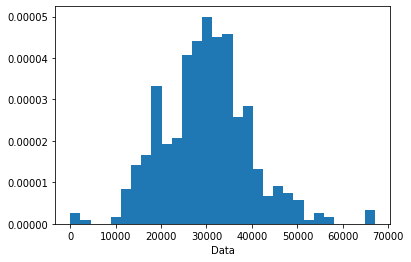

In [446]:
x=df["Monthly_G_S_"]
plt.hist(x, density=True, bins=30)
plt.xlabel('Data')


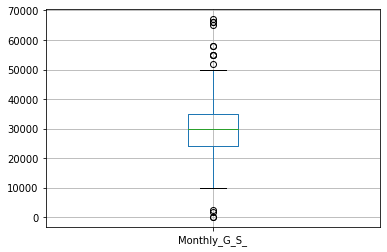

In [451]:
boxplot = df.boxplot(column=['Monthly_G_S_'])

In [452]:
#d = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep="\t")

In [453]:
#d.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


In [454]:
#d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year', '2_year', '3_year'])

In [455]:
#d_melt.head()

,Genotype,variable,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


In [467]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Monthly_G_S_ ~ C(recoded_Years_Ex_in_Product_Roles) + C(recoded_Seniority_Level) + C(recoded_Years_Ex_in_Product_Roles):C(recoded_Seniority_Level)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(recoded_Years_Ex_in_Product_Roles),4.0,1.741319e+10,4.353297e+09,87.494707,9.130908e-57
C(recoded_Seniority_Level),4.0,6.200533e+09,1.550133e+09,31.155340,2.887492e-23
C(recoded_Years_Ex_in_Product_Roles):C(recoded_Seniority_Level),16.0,2.223008e+09,1.389380e+08,2.792444,2.406858e-04
Residual,518.0,2.577308e+10,4.975498e+07,NaN,NaN


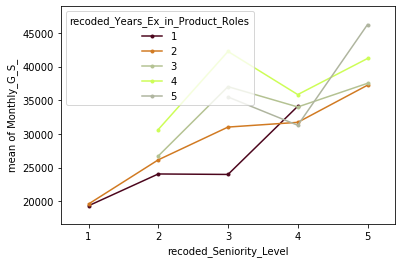

In [471]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=df['recoded_Seniority_Level'], trace=df['recoded_Years_Ex_in_Product_Roles'], response=df['Monthly_G_S_'], 
    colors=['#4c061d','#d17a22', '#b4c292','#cdfd57','#afb59f'])
plt.show()

In [ ]:
#linesis not parallel in an ordinal interaction,the interaction effect will be significant



In [472]:
#non interaction
model = ols('Monthly_G_S_ ~ C(recoded_Years_Ex_in_Product_Roles) + C(recoded_Seniority_Level)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(recoded_Years_Ex_in_Product_Roles),4.0,1.741319e+10,4.353297e+09,85.860174,3.556870e-56
C(recoded_Seniority_Level),4.0,6.200533e+09,1.550133e+09,30.573312,6.528753e-23
Residual,529.0,2.682145e+10,5.070217e+07,NaN,NaN


In [ ]:
#2 מה רמת ההשפעה של תואר לא מדעי על כניסה לתפקיד ניהול מוצר בחברת תוכנה

In [ ]:
BSc, Industrial Engineering and Management     71
BSc, Computer Science                          68
BA, other                                      59
No bachelors degree                            50
BSc, other                                     39
BA, Business Administration                    32
BA, Computer Science                           31
BA, Psychology                                 29
BA, Economics                                  27
BSc, Electrical and Electronics Engineering    26
BSc, Information Systems                       20
BA, Communication                              17
BA, Computer Science and Math                  15
BSc, Biomedical Engineering                    14
B.Des                                           8
BSc, Computer Engineering                       7
BSc, Mechanical Engineering                     5
BA, Philosophy                                  5
BSc, Physics                                    4
NaN                                             4
BSc, Economics                                  3
BA, Linguistics                                 2
BSc, Computational Biology                      1
 BA, Mathematics 

In [ ]:
BSc, Industrial Engineering and Management=1;
BSc, Computer Science =1;
BA, other=0;
No bachelors degree=0;
BSc, other=1;
BA, Business Administration=0;
BA, Computer Science=0;
BA, Psychology=0;
BA, Economics=0;
BSc, Electrical and Electronics Engineering=1;
BSc, Information Systems=1;
BA, Communication=0;
BA, Computer Science and Math=1;
BSc, Biomedical Engineering=1;
B.Des=0;
BSc, Computer Engineering=1;
BSc, Mechanical Engineering=1;
BA, Philosophy=0;
BSc, Physics=1;
BSc, Economics=1;
BA, Linguistics=0;
BSc, Computational Biology=1;
BA, Mathematics=1;

In [ ]:
#3 מה רמת ההשפעה של תפקיד לא מדעי קודם על כניבסה לתפקיד ניהול מוצר בחברת תוכנה

In [ ]:
#4 מה רמת ההשפעה של תואר לא מדעי , תפקיד קודם לא מהתחום תוכנה ושנת נסיון בתפקיד על כניסה לתפקיד ניהול מוצר בחברת תוכנה